# Introduction to Data Science, CS 5963 / Math 3900
## Lab 15: Ranking in Practice 

We look at rating/ranking college football teams. 

There are a lot of different methods for rating/ranking. Here is a webpage with a comparison:
[masseyratings.com](http://www.masseyratings.com/cf/compare.htm)

## College Football Primer

National Collegiate Athletic Association (NCAA) College Football is divided into two subdivisions: 
- Football Bowl Subdivision (FBS), formerly  Division I-A
- Football Championship Subdivision (FCS), formerly Division I-AA

Our goal will be to rank the 128 teams in the FBS. 

The FBS is further divided into 11 conferences, some of which have sub-divisions. The University of Utah is in the South Division of the Pacific 12 (Pac-12) Conference. 

      A.  American Athletic Conference
           i) East Division
                Central Florida
                Cincinnati
                Connecticut
                East Carolina
                South Florida
                Temple
          ii) West Division
                Houston
                Memphis
                Navy
                SMU
                Tulane
                Tulsa
      B.  Atlantic Coast Conference       
           i) Atlantic Division
                Boston College
                Clemson
                Florida St
                Louisville
                North Carolina St
                Syracuse
                Wake Forest
         ii) Coastal Division
                Duke
                Georgia Tech
                Miami FL
                North Carolina
                Pittsburgh
                Virginia
                Virginia Tech       
      C.  Big 10 Conference
           i) East Division
                Indiana
                Maryland
                Michigan
                Michigan St
                Ohio State
                Penn State
                Rutgers
         ii) West Division
                Illinois
                Iowa
                Minnesota
                Nebraska
                Northwestern
                Purdue
                Wisconsin      
      D.  Big 12 Conference
            Baylor
            Iowa St
            Kansas
            Kansas St
            Oklahoma
            Oklahoma St
            Texas
            TCU 
            Texas Tech
            West Virginia
      E.  Conference USA
           i) East Division
                Florida Atlantic
                Florida Int'l
                Marshall
                Middle Tennessee St
                UNC-Charlotte
                Old Dominion
                Western Kentucky
          ii) West Division
                Louisiana Tech
                North Texas
                Rice
                Southern Miss
                Texas-San Antonio
                UTEP                   
      F.  Mid-American Conference
           i) East Division
                Akron
                Bowling Green
                Buffalo
                Kent St
                Miami OH
                Ohio U.
          ii) West Division
                Ball St
                Central Michigan
                Eastern Michigan
                Northern Illinois
                Toledo
                Western Michigan
      G.  Mountain West Conference
           i) Mountain Division
                Air Force
                Boise St
                Colorado St
                New Mexico
                Utah St
                Wyoming
          ii) West Division
                Fresno St
                Hawai`i
                Nevada
                San Diego St
                San José St
                UNLV      
      H.  Pacific 12 Conference
           i) North Division
                California
                Oregon
                Oregon St
                Stanford
                Washington
                Washington St
          ii) South Division
                Arizona
                Arizona St
                Colorado
                Southern Cal
                UCLA  
                Utah        
      I.  Southeastern Conference
           i) Eastern Division
                Florida
                Georgia
                Kentucky
                Missouri
                South Carolina
                Tennessee
                Vanderbilt
          ii) Western Division
                Alabama
                Arkansas
                Auburn
                LSU
                Mississippi
                Mississippi St
                Texas A&M
      J.  Sun Belt Conference
            Appalachian St
            Arkansas St
            Georgia Southern
            Georgia St
            Idaho
            Louisiana-Lafayette
            Louisiana-Monroe
            New Mexico St
            South Alabama
            Texas St-San Marcos
            Troy
      K.  Division I FBS Independents
            Army
            Brigham Young
            Massachusetts
            Notre Dame  

More conference information available [here](http://prwolfe.bol.ucla.edu/cfootball/conferences.htm). 

## Download data

We download the 2016 College Football game results from 
[this website](http://masseyratings.com/scores.php?s=286577&sub=286577&all=1). So far, there have been 4203 games. 



In [1]:
# imports and setup
import numpy as np
import pandas as pd
import networkx as nx

from bs4 import BeautifulSoup
import urllib.request
from io import StringIO

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


### First get a list of team names

In [2]:
url = "http://masseyratings.com/scores.php?s=286577&sub=286577&all=1&mode=3&format=2"
with urllib.request.urlopen(url) as response:
   html = response.read()
soup = BeautifulSoup(html, 'html.parser')

print(soup)

   1, Abilene_Chr
   2, Acadia
   3, Adams_St
   4, Adrian
   5, Air_Force
   6, Akron
   7, Alabama
   8, Alabama_A&amp;M;
   9, Alabama_St
  10, Albany_GA
  11, Albany_NY
  12, Alberta
  13, Albion
  14, Albright
  15, Alcorn_St
  16, Ald-Broaddus
  17, Alfred
  18, Alfred_St
  19, Allan_Hancock
  20, Allegheny
  21, Alma
  22, American_Intl
  23, American_River
  24, Amherst
  25, Anderson_IN
  26, Angelo_St
  27, Anna_Maria
  28, Antelope_Val_CC
  29, Appalachian_St
  30, Apprentice
  31, Arizona
  32, Arizona_Chr
  33, Arizona_St
  34, Ark_Baptist
  35, Ark_Monticello
  36, Ark_Pine_Bluff
  37, Arkansas
  38, Arkansas_St
  39, Arkansas_Tech
  40, Army
  41, ASA
  42, ASA_Miami
  43, Ashland
  44, Assumption
  45, Auburn
  46, Augsburg
  47, Augustana_IL
  48, Augustana_SD
  49, Aurora
  50, Austin_Col
  51, Austin_Peay
  52, Ave_Maria
  53, Averett
  54, Avila
  55, AZ_Western
  56, Azusa_Pacific
  57, Bacone
  58, Baker_KS
  59, Bakersfield_Col
  60, Baldwin-Wallace
  61, Ball_St

In [3]:
list_names = soup.get_text().split()[1::2]
teams = pd.DataFrame(list_names,index=np.arange(len(list_names)),columns=['team'])

num_teams = teams.shape[0]
print(num_teams)

print(teams)

924
                team
0        Abilene_Chr
1             Acadia
2           Adams_St
3             Adrian
4          Air_Force
5              Akron
6            Alabama
7       Alabama_A&M;
8         Alabama_St
9          Albany_GA
10         Albany_NY
11           Alberta
12            Albion
13          Albright
14         Alcorn_St
15      Ald-Broaddus
16            Alfred
17         Alfred_St
18     Allan_Hancock
19         Allegheny
20              Alma
21     American_Intl
22    American_River
23           Amherst
24       Anderson_IN
25         Angelo_St
26        Anna_Maria
27   Antelope_Val_CC
28    Appalachian_St
29        Apprentice
..               ...
894   WI_River_Falls
895    WI_Stevens_Pt
896         WI_Stout
897    WI_Whitewater
898          Widener
899           Wilkes
900       Willamette
901   William_&_Mary
902     William_Penn
903         Williams
904    Wilmington_OH
905          Windsor
906          Wingate
907        Winona_St
908        Wisconsin
909      

In [4]:
# where is Utah in the Pandas series teams? 
teams[teams['team']=='Utah'].index.tolist()

[823]

In [5]:
teams.loc[823]

team    Utah
Name: 823, dtype: object

### Get the game results

In [6]:
url = "http://masseyratings.com/scores.php?s=286577&sub=286577&all=1&mode=3&format=1"
with urllib.request.urlopen(url) as response:
   html = response.read()
soup = BeautifulSoup(html, 'html.parser')

soup

736566,20160825,   637, -1,  24,    84,  1,  20
736566,20160825,   430, -1,  33,   200,  1,  29
736566,20160825,   201,  1,  23,   118, -1,  17
736566,20160825,   831,  1,  15,   380, -1,  10
736566,20160825,   558,  1,  27,   303, -1,  23
736566,20160825,   866, -1,  37,   445,  1,  14
736567,20160826,   115,  0,  51,   334,  0,  31
736567,20160826,   204, -1,  34,   205,  1,  30
736568,20160827,    58,  1,  36,   314, -1,  13
736568,20160827,    77,  1,  64,   515, -1,  37
736568,20160827,    92,  1,  23,   855, -1,  19
736568,20160827,   635, -1,  39,   132,  1,  14
736568,20160827,   490, -1,  52,   199,  1,  41
736568,20160827,   547,  0,  29,   222,  0,  13
736568,20160827,    70, -1,  35,   259,  1,   3
736568,20160827,   456,  1,  56,   757, -1,  10
736568,20160827,   492,  1,  49,   617, -1,  21
736568,20160827,   671, -1,  31,   544,  1,  21
736568,20160827,   554,  1,  24,   143, -1,  17
736568,20160827,   658,  1,  55,   642, -1,   2
736568,20160827,   750, -1,  34,   794, 

In [7]:
soup_text = soup.get_text()
df = pd.read_csv(StringIO(soup_text),names=['id','date','team1','homefield1','score1','team2','homefield2','score2'])

num_games = df.shape[0]
print(num_games)

df.head()

4206


,id,date,team1,homefield1,score1,team2,homefield2,score2
0,736566,20160825,637,-1,24,84,1,20
1,736566,20160825,430,-1,33,200,1,29
2,736566,20160825,201,1,23,118,-1,17
3,736566,20160825,831,1,15,380,-1,10
4,736566,20160825,558,1,27,303,-1,23


### Clean the data

In [8]:
# add a new column with team names
df.drop(['homefield1','homefield2'],inplace=True,axis=1)
df.insert(3, 'team_name1', df['team1'].map(lambda x: teams['team'][x-1]))
df.insert(6, 'team_name2', df['team2'].map(lambda x: teams['team'][x-1]))
df.head()


,id,date,team1,team_name1,score1,team2,team_name2,score2
0,736566,20160825,637,Pikeville,24,84,Bluefield_VA,20
1,736566,20160825,430,Lindsey_Wilson,33,200,Cumberland_TN,29
2,736566,20160825,201,Cumberlands_KY,23,118,Campbellsville,17
3,736566,20160825,831,Valley_City_St,15,380,Jamestown,10
4,736566,20160825,558,Navarro,27,303,Georgia_Mil,23


## Consider only Pac 12 teams

In [9]:
P12 = ['California', 'Oregon', 'Oregon_St', 'Stanford', 'Washington', 'Washington_St', 
    'Arizona', 'Arizona_St', 'Colorado', 'USC', 'UCLA', 'Utah'] 
num_P12_teams = len(P12)

# get PAC12 teams from teams
P12_ind = teams[teams['team'].isin(P12)].index.tolist()  
P12_teams = teams.loc[P12_ind]

# assign a new ordering for teams
P12_teams['P12_ind'] = np.arange(num_P12_teams)
P12_teams['global_ind'] = P12_teams.index
P12_teams.set_index('P12_ind',inplace=True)

P12_teams


,team,global_ind
P12_ind,,
0,Arizona,30
1,Arizona_St,32
2,California,114
3,Colorado,176
4,Oregon,618
5,Oregon_St,619
6,Stanford,757
7,UCLA,812
8,USC,821


In [10]:
P12_df = df[(df['team_name1'].isin(P12)) & (df['team_name2'].isin(P12))].copy()
num_P12_games = P12_df.shape[0]
print(num_P12_games)
print(P12_df)


38
          id      date  team1     team_name1  score1  team2  team_name2  \
972   736589  20160917    758       Stanford      27    822         USC   
1317  736595  20160923    824           Utah      31    822         USC   
1371  736596  20160924    862     Washington      35     31     Arizona   
1372  736596  20160924     33     Arizona_St      51    115  California   
1373  736596  20160924    177       Colorado      41    619      Oregon   
1376  736596  20160924    758       Stanford      22    813        UCLA   
1723  736602  20160930    862     Washington      44    758    Stanford   
1776  736603  20161001    177       Colorado      47    620   Oregon_St   
1781  736603  20161001    813           UCLA      45     31     Arizona   
1782  736603  20161001    822            USC      41     33  Arizona_St   
1783  736603  20161001    115     California      28    824        Utah   
1784  736603  20161001    864  Washington_St      51    619      Oregon   
2201  736610  20161008

## Use the Least Squares method to construct a rating
See Lecture 16. 

We first construct the pairwise comparisons, $y_{i,j}$ defined by
$$
y_{i,j} = \frac{\text{points team $j$ scored - points team $i$ scored}}{\text{total points in game}}. 
$$


In [11]:
P12_df['y'] = (P12_df['score1'] - P12_df['score2']) / (P12_df['score1'] + P12_df['score2'])
y = P12_df['y'].tolist()
P12_df

,id,date,team1,team_name1,score1,team2,team_name2,score2,y
972,736589,20160917,758,Stanford,27,822,USC,10,0.459459
1317,736595,20160923,824,Utah,31,822,USC,27,0.068966
1371,736596,20160924,862,Washington,35,31,Arizona,28,0.111111
1372,736596,20160924,33,Arizona_St,51,115,California,41,0.108696
1373,736596,20160924,177,Colorado,41,619,Oregon,38,0.037975
1376,736596,20160924,758,Stanford,22,813,UCLA,13,0.257143
1723,736602,20160930,862,Washington,44,758,Stanford,6,0.760000
1776,736603,20161001,177,Colorado,47,620,Oregon_St,6,0.773585
1781,736603,20161001,813,UCLA,45,31,Arizona,24,0.304348
1782,736603,20161001,822,USC,41,33,Arizona_St,20,0.344262


Construct the arc-vertex incidence matrix
$$
B_{k,j} = \begin{cases}
1 & j = \textrm{head}(k) \\
-1 & j = \textrm{tail}(k) \\
0 & \textrm{otherwise}. 
\end{cases}
$$
This just keeps track of which teams played in each game. 

In [12]:
# first we need to reorder the teams in the PAC12 ordering

print(P12_teams['global_ind'].tolist())

glob_P12_dict = {j:i for i,j in enumerate(P12_teams['global_ind'].tolist())}
print(glob_P12_dict)

[30, 32, 114, 176, 618, 619, 757, 812, 821, 823, 861, 863]
{32: 1, 618: 4, 619: 5, 812: 7, 176: 3, 114: 2, 757: 6, 823: 9, 863: 11, 861: 10, 30: 0, 821: 8}


In [13]:
# construct B

B = np.zeros((num_P12_games, num_P12_teams))

for ii,g in enumerate(P12_df.index):
    team1_global_ind = P12_df['team1'][g]
    team1_P12_ind = glob_P12_dict[team1_global_ind-1]    
    B[ii,team1_P12_ind] = 1

    team2_global_ind = P12_df['team2'][g]
    team2_P12_ind = glob_P12_dict[team2_global_ind-1]    
    B[ii,team2_P12_ind] = -1


In [14]:
# now we have enough information just to print the  game results 
for i,sc in enumerate(y):
    head = np.where(B[i,:]==1)[0][0]
    tail = np.where(B[i,:]==-1)[0][0]
    print(P12_teams['team'][head] + ' vs. ' + P12_teams['team'][tail] + ': ' +str(sc))

Stanford vs. USC: 0.459459459459
Utah vs. USC: 0.0689655172414
Washington vs. Arizona: 0.111111111111
Arizona_St vs. California: 0.108695652174
Colorado vs. Oregon: 0.0379746835443
Stanford vs. UCLA: 0.257142857143
Washington vs. Stanford: 0.76
Colorado vs. Oregon_St: 0.77358490566
UCLA vs. Arizona: 0.304347826087
USC vs. Arizona_St: 0.344262295082
California vs. Utah: 0.0980392156863
Washington_St vs. Oregon: 0.214285714286
Utah vs. Arizona: 0.220338983051
Arizona_St vs. UCLA: 0.0697674418605
Washington vs. Oregon: 0.538461538462
Oregon_St vs. California: 0.032967032967
Washington_St vs. Stanford: 0.448275862069
USC vs. Colorado: 0.105263157895
Colorado vs. Arizona_St: 0.428571428571
USC vs. Arizona: 0.548387096774
Washington_St vs. UCLA: 0.125
Utah vs. Oregon_St: 0.151515151515
California vs. Oregon: 0.029702970297
Washington_St vs. Arizona_St: 0.0724637681159
Colorado vs. Stanford: 0.333333333333
Washington vs. Oregon_St: 0.413793103448
Utah vs. UCLA: 0.0721649484536
USC vs. Califor

We now use the *lstsq* function in the np.linalg library to find the least squares rating, solving the least squares problem, 
$$
\min_{\phi} \ \| B \phi - y \|^2. 
$$

In [15]:
phi = np.linalg.lstsq(B,y,rcond=.1)[0]
print(phi)

[-0.33303197 -0.12720734 -0.10923611  0.25131859 -0.06658019 -0.16250019
  0.03316876 -0.08954636  0.11904235  0.02641395  0.29303793  0.1651206 ]


In [16]:
P12_teams['rating'] = phi
print(P12_teams)

                  team  global_ind    rating
P12_ind                                     
0              Arizona          30 -0.333032
1           Arizona_St          32 -0.127207
2           California         114 -0.109236
3             Colorado         176  0.251319
4               Oregon         618 -0.066580
5            Oregon_St         619 -0.162500
6             Stanford         757  0.033169
7                 UCLA         812 -0.089546
8                  USC         821  0.119042
9                 Utah         823  0.026414
10          Washington         861  0.293038
11       Washington_St         863  0.165121


## Sort the ratings to generate a ranking


In [17]:
P12_rankings = P12_teams.sort_values('rating', axis=0, ascending=False)
P12_rankings['ranking'] = np.arange(1,num_P12_teams+1)
P12_rankings.set_index('ranking',inplace=True)
P12_rankings.drop('global_ind',axis=1,inplace=True)
print(P12_rankings)

                  team    rating
ranking                         
1           Washington  0.293038
2             Colorado  0.251319
3        Washington_St  0.165121
4                  USC  0.119042
5             Stanford  0.033169
6                 Utah  0.026414
7               Oregon -0.066580
8                 UCLA -0.089546
9           California -0.109236
10          Arizona_St -0.127207
11           Oregon_St -0.162500
12             Arizona -0.333032


Compare against the PAC 12 rankings [here](https://pac-12.com/football/standings).

## Visualize the schedule

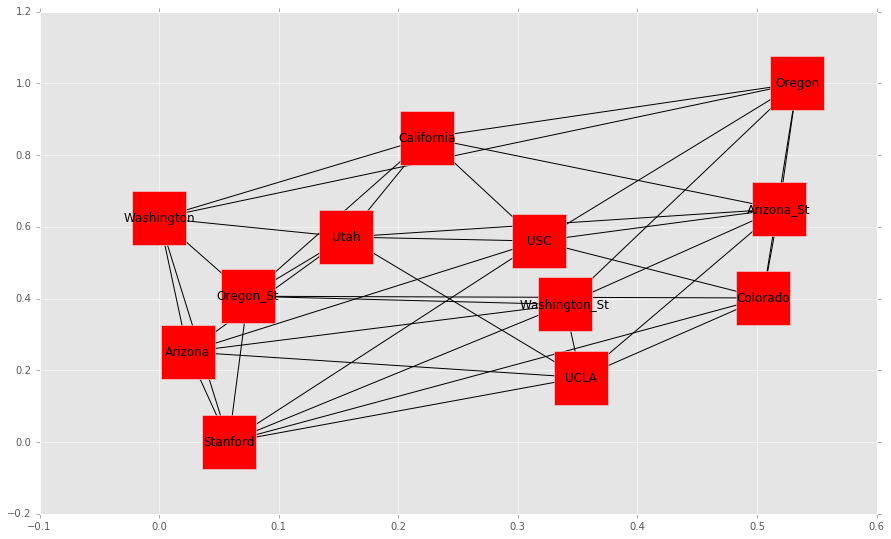

In [18]:
# make graph
Lap = np.dot(np.transpose(B),B)
adj = -Lap + np.diag(np.diag(Lap))
game_graph = nx.from_numpy_matrix(adj)

# Calculate the layout positions first
pos = nx.spring_layout(game_graph)

# labeling needs a dictionary
label_dict = {i:j for i,j in enumerate(P12_teams['team'].tolist())}

# draw graph
nx.draw_networkx(game_graph, pos=pos, node_size=3000, labels = label_dict, node_shape='s')
plt.show()
